In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [44]:
# read the file
data = pd.read_csv('D:\\INTI Degree\\DEG YEAR 3 INTI-Sem 8\\Machine Learning\\bbc-text.csv', encoding='ISO-8859-1')


In [45]:
# read the top 5 rows
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [47]:
categories = data['category'].unique()
categories

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [48]:
null_count = data.isnull().sum()

# check for null
print(null_count)

category    0
text        0
dtype: int64


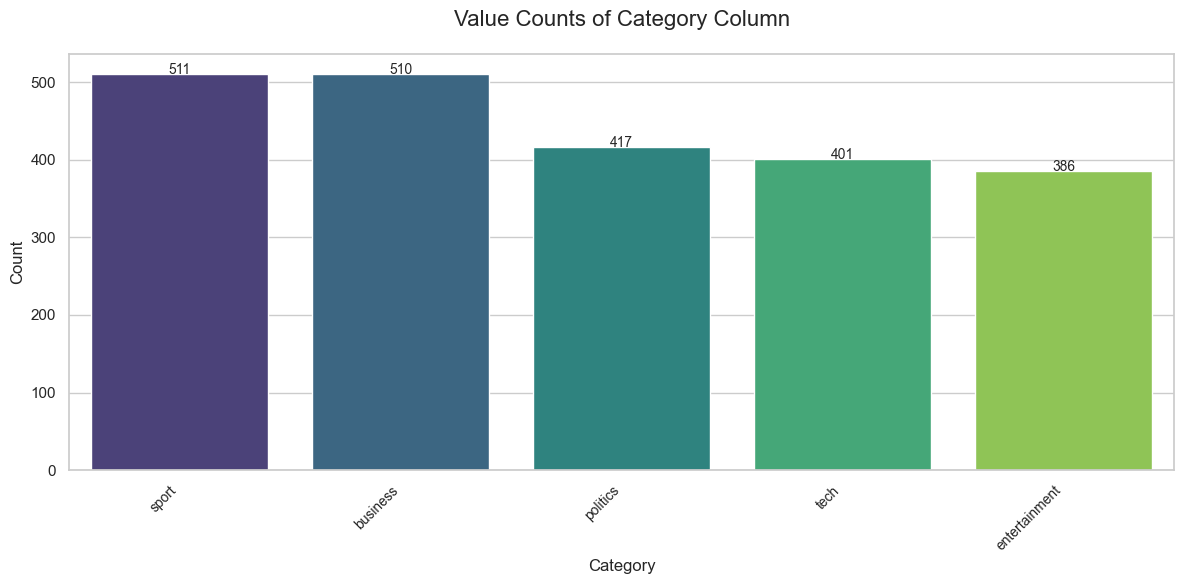

In [49]:
value_counts = data['category'].value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

ax.set_title('Value Counts of Category Column', fontsize=16, pad=20)  
ax.set_xlabel('Category', fontsize=12)  
ax.set_ylabel('Count', fontsize=12)  

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10)

plt.tight_layout()  
plt.show()


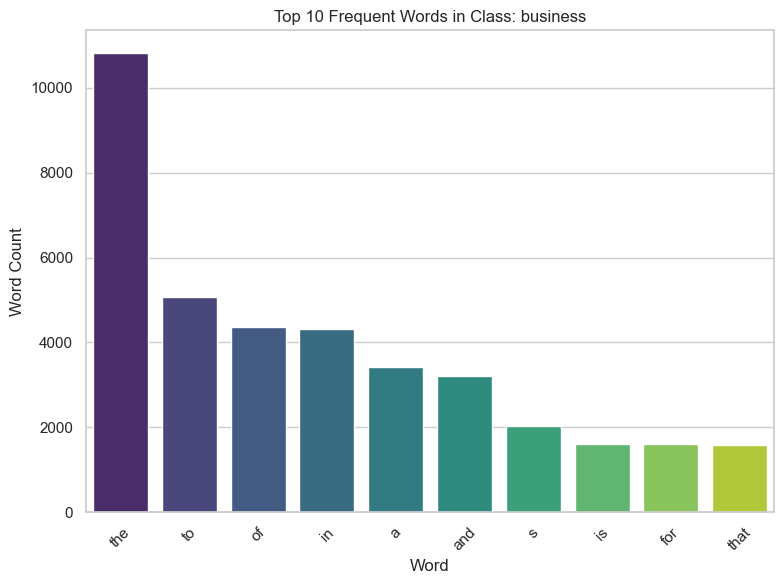

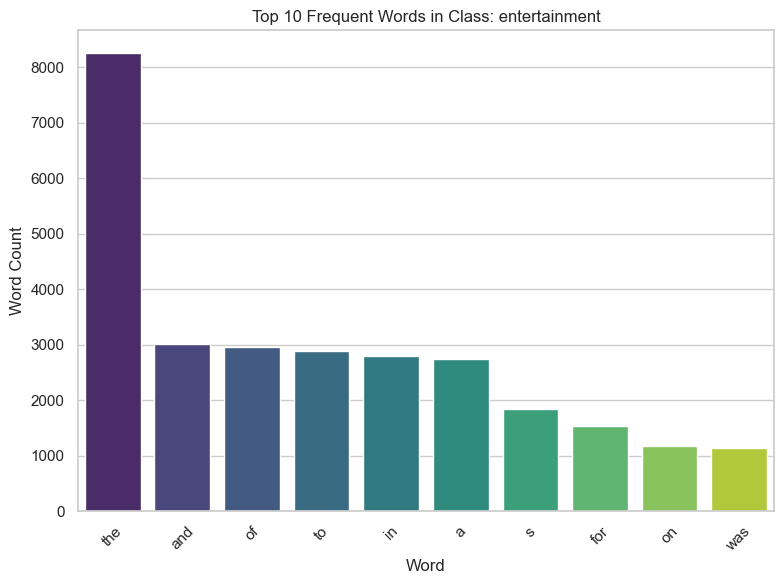

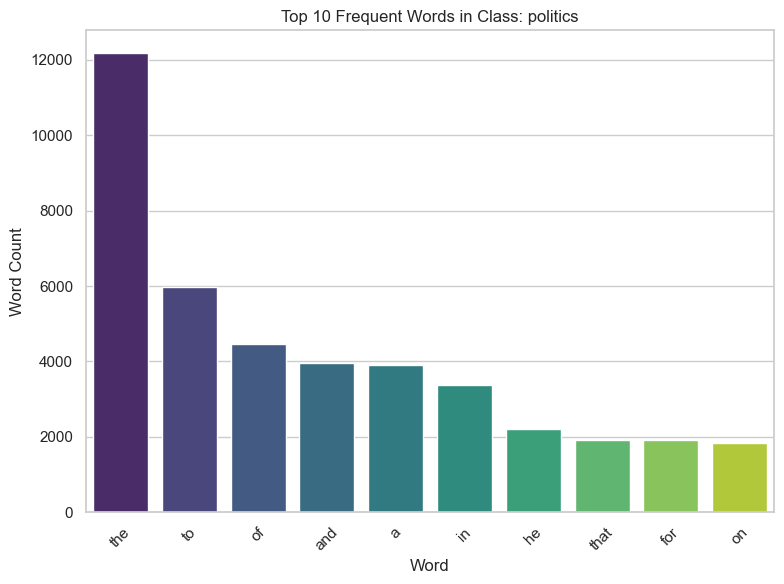

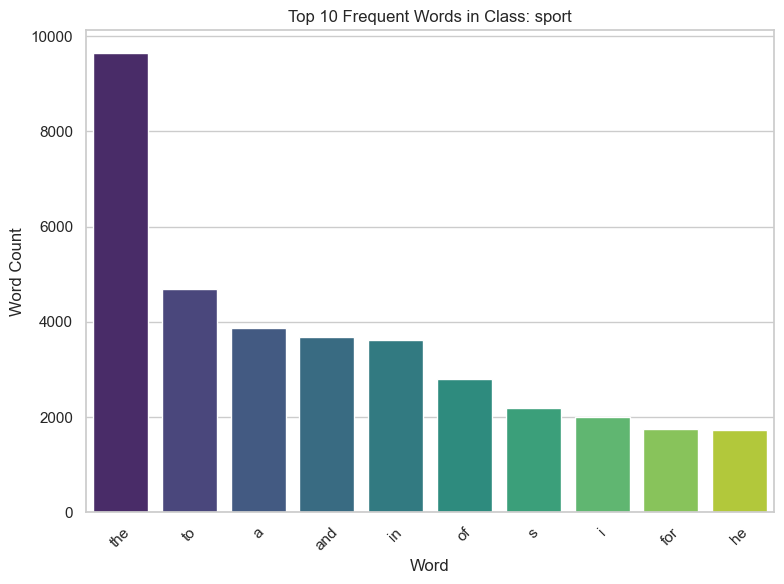

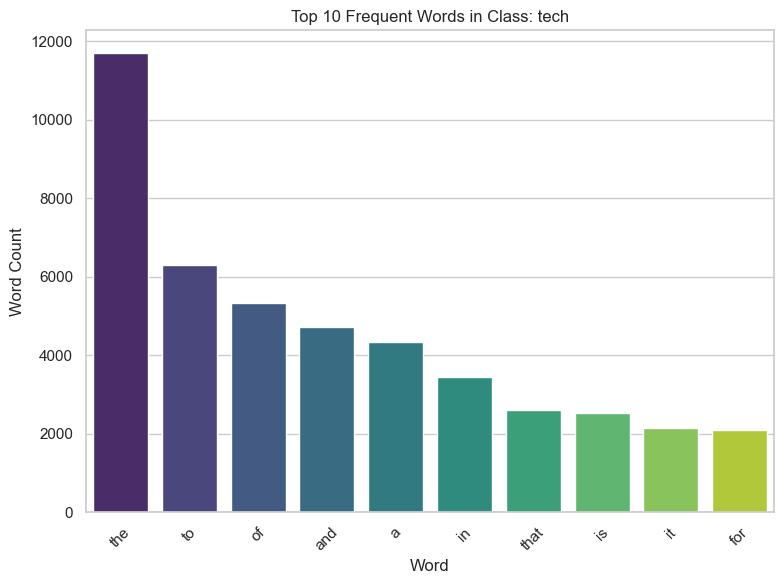

In [50]:
def get_top_words_category(data, text_column_name):
    # dictionary to store the top 10 frequent words for each category
    top_words_by_class = {}

    grouped = data.groupby('category')

    for category, group_df in grouped:
        # concatenate all text in the group
        text = ' '.join(group_df[text_column_name])

        # tokenize the text (split it into words)
        words = text.split()

        # count the frequency of each word using a simple for loop
        word_counts = {}
        for word in words:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1

        # get the top 10 frequent words for the class
        top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10])

        # store the top words in the dictionary
        top_words_by_class[category] = top_words

    # plot the top 10 frequent words for each class in separate figures
    for category, top_words in top_words_by_class.items():
        top_words_df = pd.DataFrame({'Word': list(top_words.keys()), 'Count': list(top_words.values())})

        plt.figure(figsize=(8, 6))
        ax = sns.barplot(x='Word', y='Count', data=top_words_df, palette='viridis')

        plt.title(f'Top 10 Frequent Words in Class: {category}')
        plt.xlabel('Word')
        plt.ylabel('Word Count')
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.show()

# usage
get_top_words_category(data, 'text')


In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [52]:
stop_words = set(stopwords.words('english'))
additional_words = {
    "i", "you", "we", "they", "he", "she", "it", "us", "me", "him", "her", "them",
    "my", "your", "our", "their", "his", "hers", "its",
    "myself", "yourself", "ourselves", "themselves", "himself", "herself", "itself",
    "would", "could", "should", "might", "must", "can", "will", "shall", "may"
}
stop_words.update(additional_words) 
punctuation = set(string.punctuation)


In [53]:
def preprocess_text(text):
    # lowercase the text
    text = text.lower()
    
    # tokenize the text
    words = word_tokenize(text)
    
    # remove stopwords and punctuation
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    
    # join the filtered and words back into a single string
    return ' '.join(filtered_words)

data['text_processed'] = data['text'].apply(preprocess_text)

data

,category,text,text_processed
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,cars pull retail figures retail sales fell 0.3...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert band rem anno...
2223,politics,how political squabbles snowball it s become c...,political squabbles snowball become commonplac...


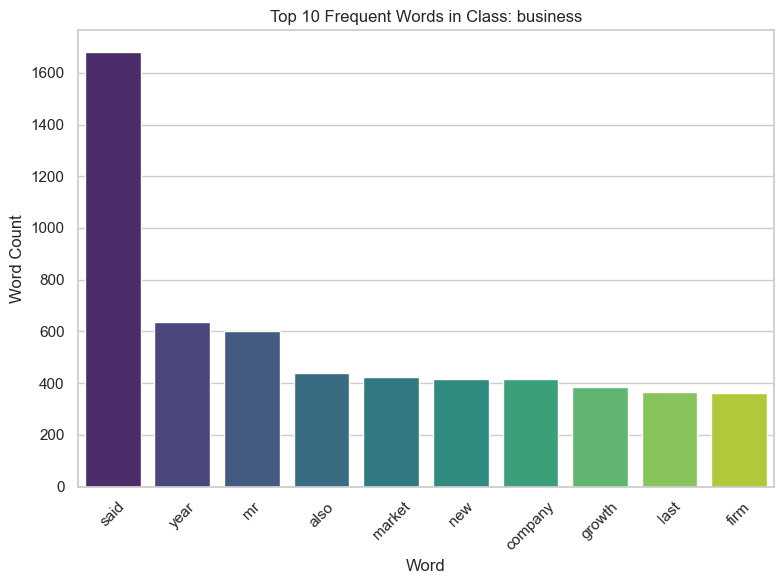

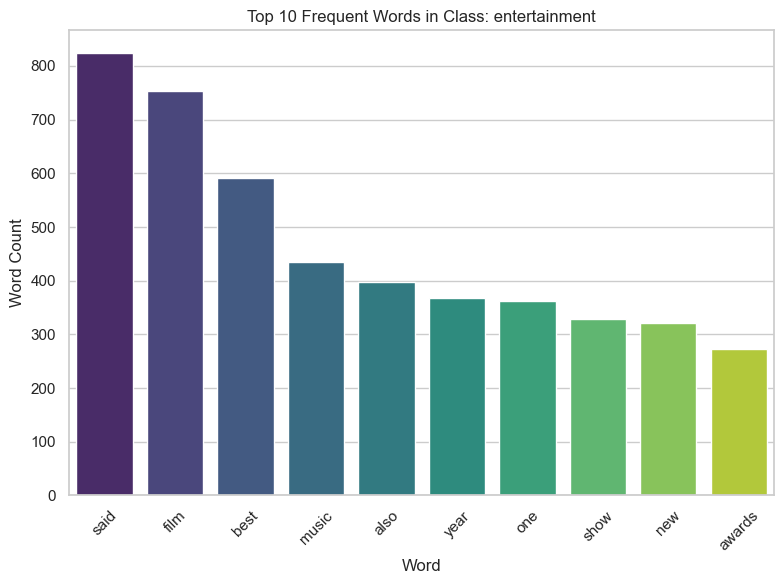

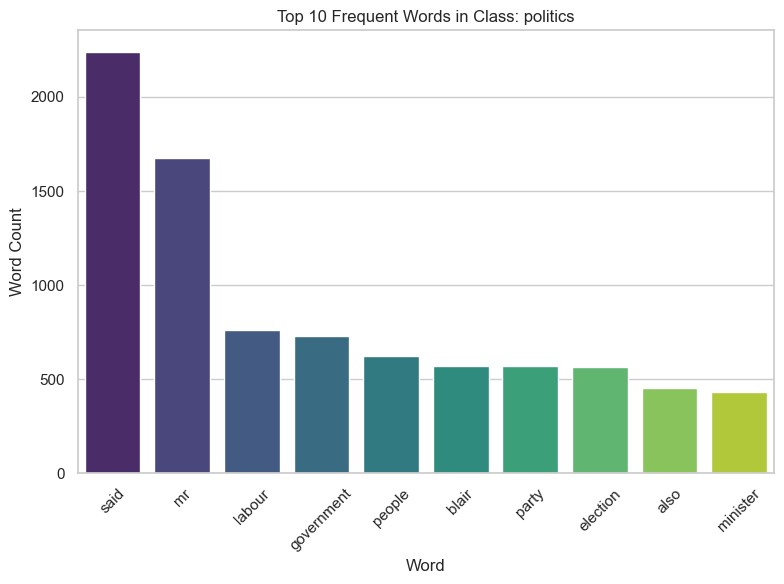

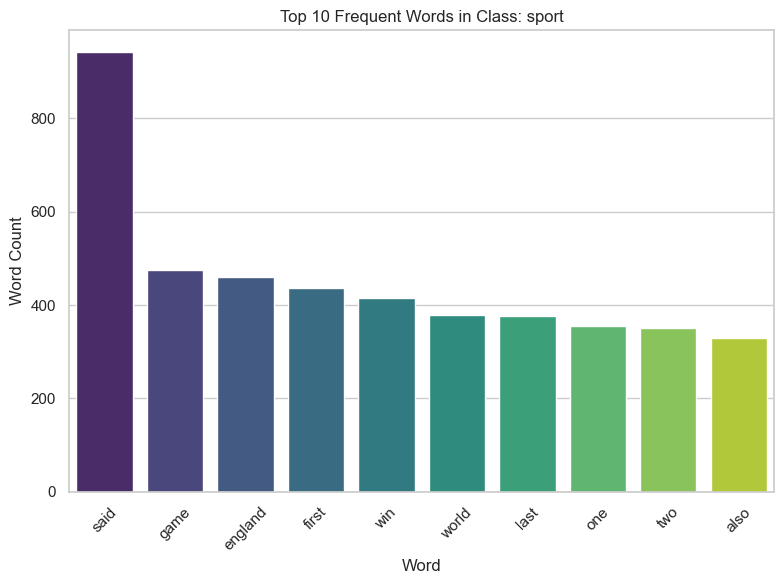

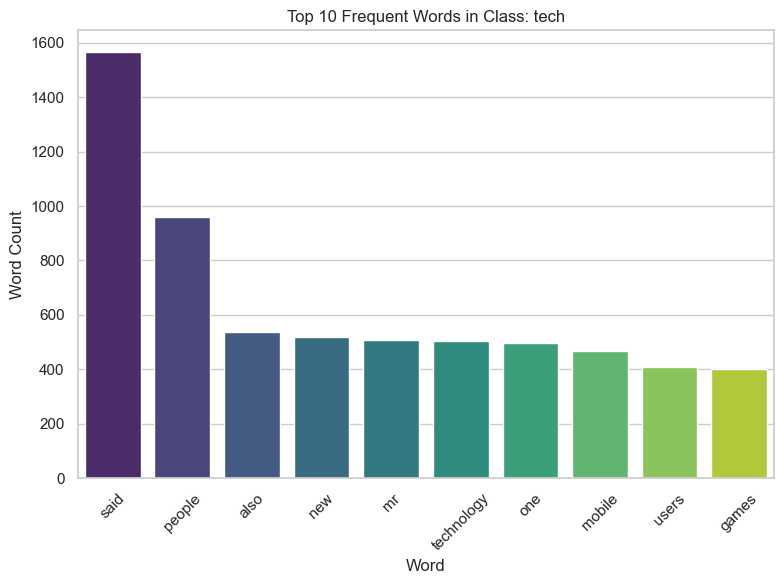

In [54]:
get_top_words_category(data,'text_processed')

In [55]:
additional_words = {
    "i", "you", "we", "they", "he", "she", "it", "us", "me", "him", "her", "them",
    "my", "your", "our", "their", "his", "hers", "its",
    "myself", "yourself", "ourselves", "themselves", "himself", "herself", "itself",
    "would", "could", "should", "might", "must", "can", "will", "shall", "may", "also", "said", "one","mr","new",
    "government", "last", "uk", "year"
}
stop_words.update(additional_words) 

def preprocess_text(text):
    # lowercase the text
    text = text.lower()
    
    # tokenize the text
    words = word_tokenize(text)
    
    # remove stopwords and punctuation
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    
    # join the filtered and words back into a single string
    return ' '.join(filtered_words)

data['text_processed'] = data['text'].apply(preprocess_text)

data

,category,text,text_processed
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,cars pull retail figures retail sales fell 0.3...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce glasgow concert band rem announce...
2223,politics,how political squabbles snowball it s become c...,political squabbles snowball become commonplac...


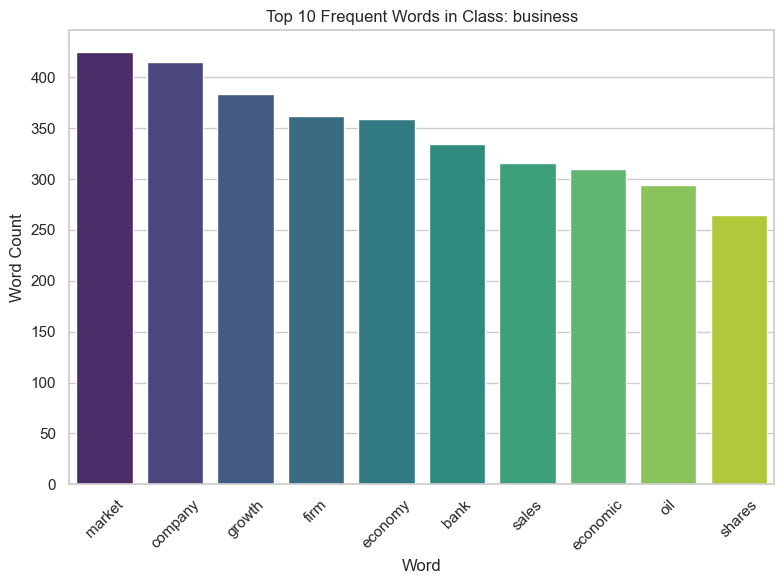

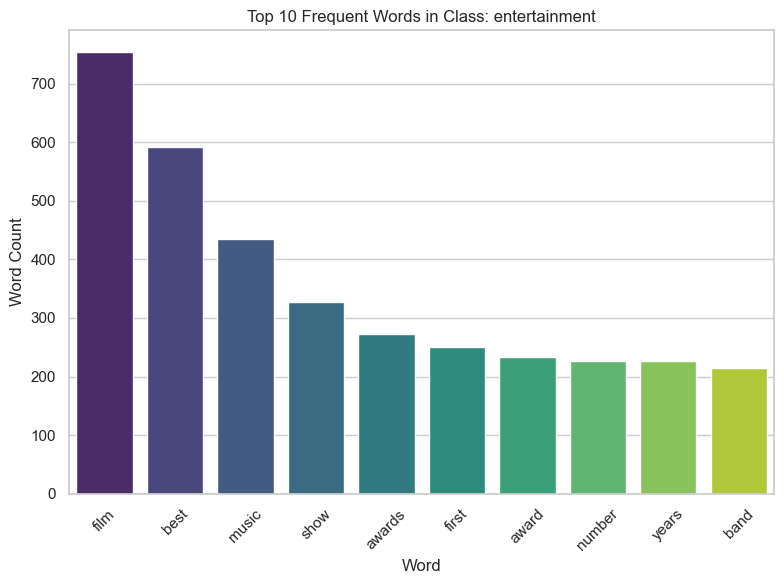

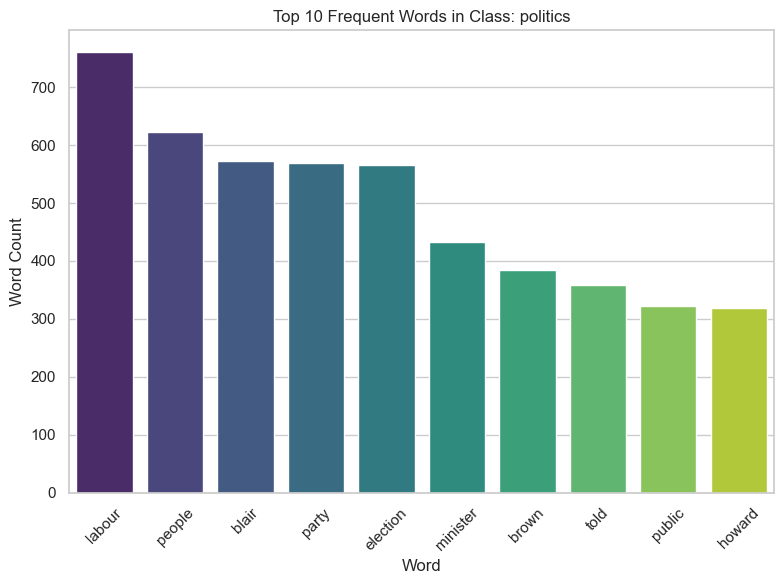

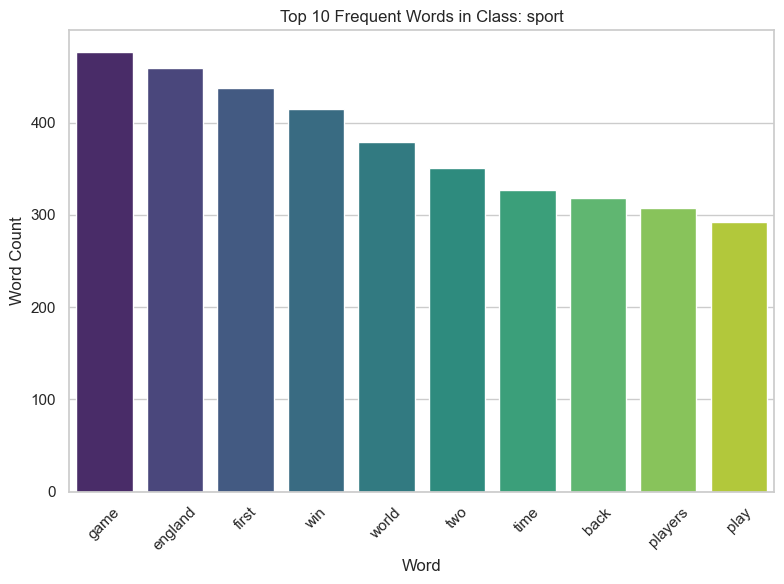

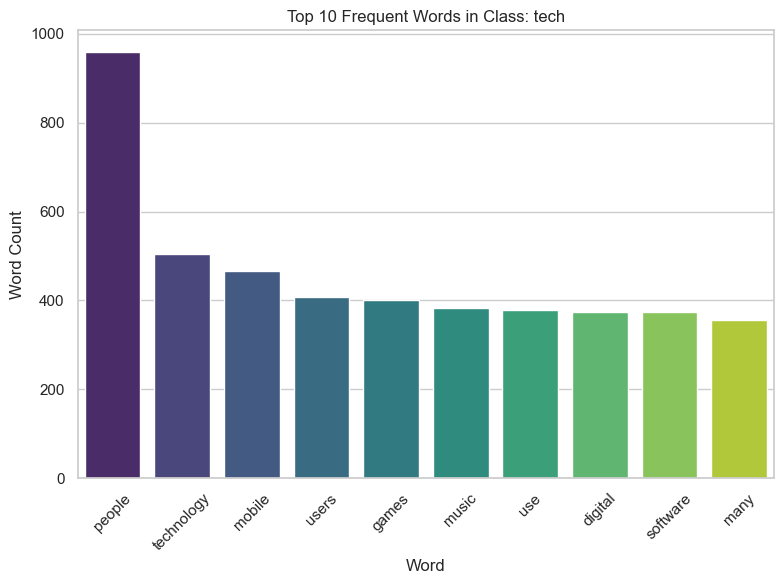

In [56]:
get_top_words_category(data,'text_processed')

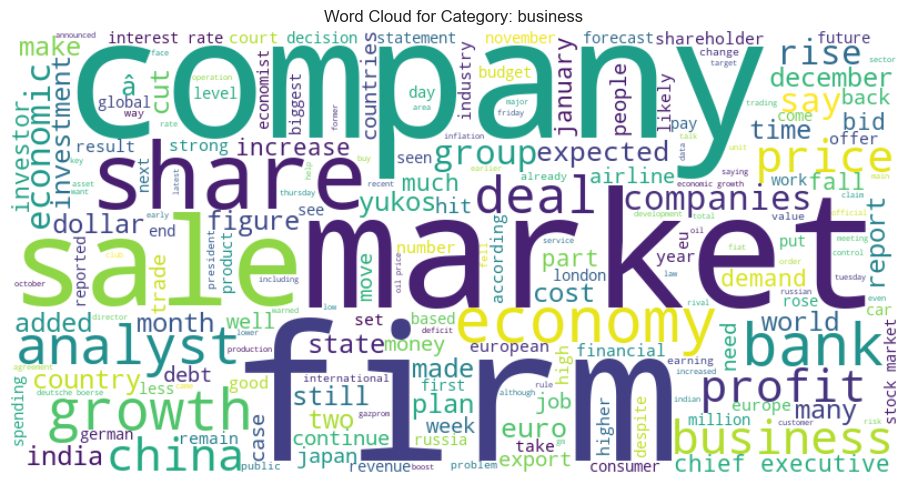

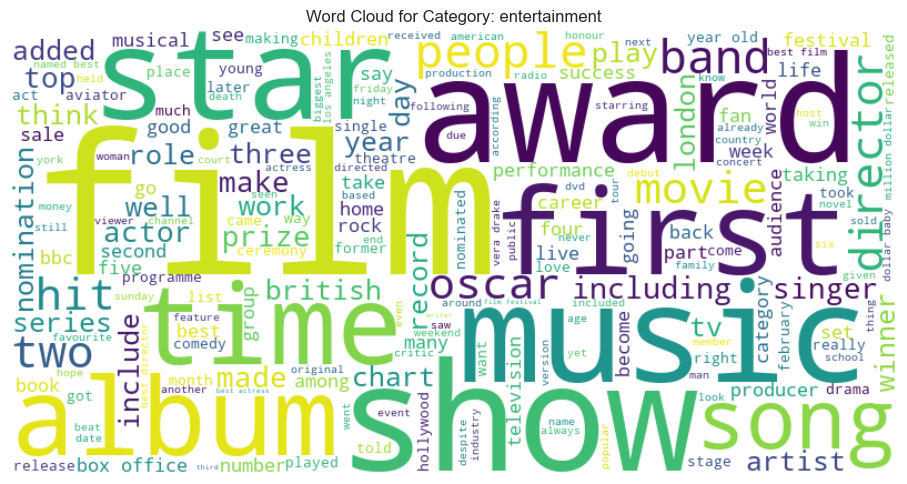

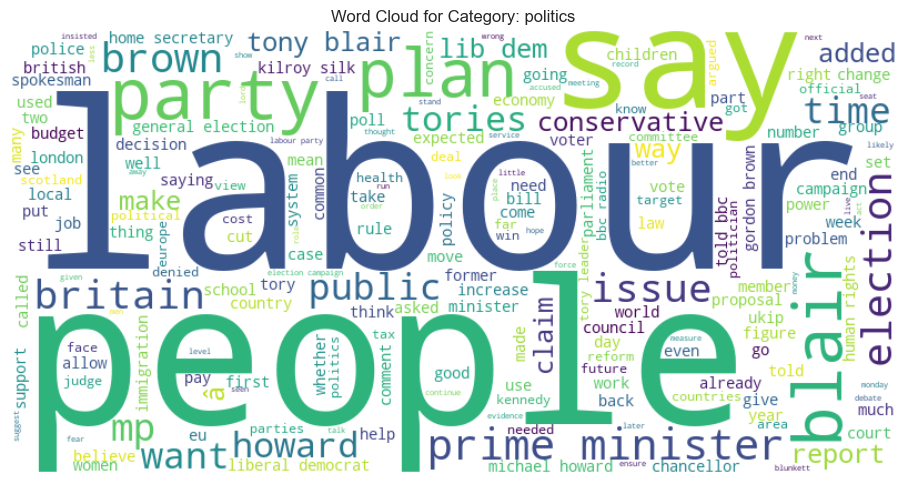

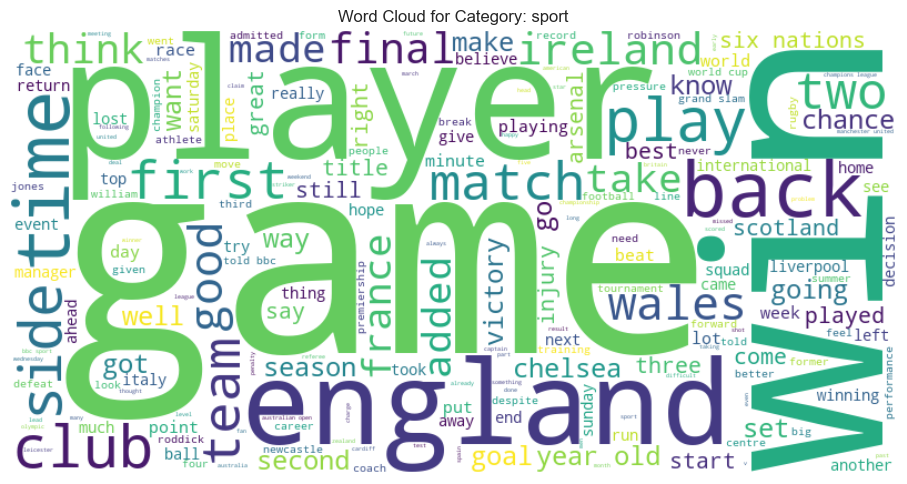

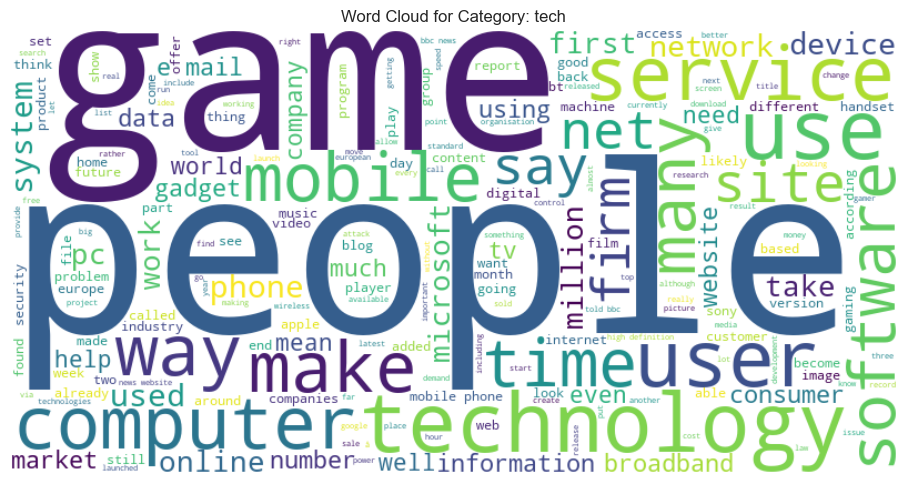

In [57]:
from wordcloud import WordCloud

def plot_word_clouds(data, text_column_name):
  
    grouped = data.groupby('category')
    
    for category, group_df in grouped:
        # combine all text for the current category
        text = ' '.join(group_df[text_column_name])

        # generate the word cloud for the entire text
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white'
        ).generate(text)

        # plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for Category: {category}")
        plt.axis("off")
        plt.tight_layout()
        plt.show()

# usage
plot_word_clouds(data, 'text_processed')

In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])
class_names = label_encoder.classes_
X = data['text_processed']
y = data['category']
y

0       4
1       0
2       3
3       3
4       1
       ..
2220    0
2221    2
2222    1
2223    2
2224    3
Name: category, Length: 2225, dtype: int32

In [59]:
# mapping of categories to their encoded numbers
category_mapping = {index: category for index, category in enumerate(class_names)}

print("Category to Encoded Number Mapping:")
for number, category in category_mapping.items():
    print(f"{number}: {category}")


Category to Encoded Number Mapping:
0: business
1: entertainment
2: politics
3: sport
4: tech


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 1557
Testing set size: 668


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from scipy.sparse import issparse

# list of classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (Linear)": SVC(kernel="linear"),
    "SVM (RBF)": SVC(kernel="rbf"),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# convert sparse matrices to dense if necessary
if issparse(X_train):
    X_train = X_train.toarray()
    X_test = X_test.toarray()

# train and evaluate each classifier
for name, clf in classifiers.items():
    try:
        print(f"Training {name}...")
        clf.fit(X_train, y_train)

        # predictions
        y_pred = clf.predict(X_test)

        # calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # display results for the classifier
        print(f"Results for {name}:")
        print(f"  Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(report)
        print("\nConfusion Matrix:")
        print(conf_matrix)
        print("-" * 40)
    except Exception as e:
        print(f"Error with {name}: {e}")
        print("-" * 40)



Training Logistic Regression...
Results for Logistic Regression:
  Accuracy: 0.9746

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       164
           1       1.00      0.97      0.99       113
           2       0.96      0.98      0.97       113
           3       0.97      1.00      0.98       146
           4       0.99      0.95      0.97       132

    accuracy                           0.97       668
   macro avg       0.98      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668


Confusion Matrix:
[[159   0   4   1   0]
 [  1 110   1   0   1]
 [  2   0 111   0   0]
 [  0   0   0 146   0]
 [  3   0   0   4 125]]
----------------------------------------
Training Random Forest...
Results for Random Forest:
  Accuracy: 0.9551

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       164
           1       0.9

Choose the best 2: linear SVM and logistic regression

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC

# initialize and train the SVM model
svc = SVC(kernel="linear", random_state=42, probability=True, C=1)
svc.fit(X_train, y_train)

# make predictions
y_pred = svc.predict(X_test)

# calculate metrics
accuracy = accuracy_score(y_test, y_pred)

# results
print("Evaluation Results for SVM (Linear):")
print(f"  Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Evaluation Results for SVM (Linear):
  Accuracy: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       164
           1       0.99      0.98      0.99       113
           2       0.95      0.98      0.97       113
           3       0.99      1.00      0.99       146
           4       0.99      0.98      0.99       132

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668


Confusion Matrix:
[[156   1   5   1   1]
 [  1 111   1   0   0]
 [  2   0 111   0   0]
 [  0   0   0 146   0]
 [  1   0   0   1 130]]


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# range of C values to test
C_values = [0.01, 0.1, 1, 10, 100]

best_params = None
best_accuracy = 0
best_model = None

# total number of iterations
total_iterations = len(C_values)

for idx, C in enumerate(C_values, start=1):
    # calculate and display progress
    progress = (idx / total_iterations) * 100
    print(f"Training with C={C}... ({progress:.2f}% complete)")
    
    # train SVM with a linear kernel
    model = SVC(kernel='linear', C=C, probability=True, random_state=42)
    model.fit(X_train, y_train)
    
    # predict on the test set
    y_pred = model.predict(X_test)
    
    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # update best model if accuracy improves
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'kernel': 'linear', 'C': C}
        best_model = model

# display the best parameters and accuracy
print("\nBest Parameters:", best_params)
print(f"Best Accuracy on Test Set: {best_accuracy:.4f}")

# evaluate the best model
y_pred_best = best_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))



Training with C=0.01... (20.00% complete)
Accuracy: 0.2186
Training with C=0.1... (40.00% complete)
Accuracy: 0.8683
Training with C=1... (60.00% complete)
Accuracy: 0.9790
Training with C=10... (80.00% complete)
Accuracy: 0.9790
Training with C=100... (100.00% complete)
Accuracy: 0.9790

Best Parameters: {'kernel': 'linear', 'C': 1}
Best Accuracy on Test Set: 0.9790

Confusion Matrix:
[[156   1   5   1   1]
 [  1 111   1   0   0]
 [  2   0 111   0   0]
 [  0   0   0 146   0]
 [  1   0   0   1 130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       164
           1       0.99      0.98      0.99       113
           2       0.95      0.98      0.97       113
           3       0.99      1.00      0.99       146
           4       0.99      0.98      0.99       132

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98    

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# train the SVM model with C = 0.1
svc = SVC(kernel="linear", random_state=42, probability=True, C=0.1)
svc.fit(X_train, y_train)

# training accuracy
train_accuracy = svc.score(X_train, y_train)

# cross-validation accuracy
cv_scores = cross_val_score(svc, X_train, y_train, cv=5, scoring="accuracy")
cv_accuracy = cv_scores.mean()

# test accuracy
test_accuracy = svc.score(X_test, y_test)

# predict on the test set
y_pred = svc.predict(X_test)

# results
print("Evaluation Results for SVM (Linear) with C=0.1:")
print(f"  Training Accuracy: {train_accuracy:.4f}")
print(f"  Cross-Validation Accuracy: {cv_accuracy:.4f}")
print(f"  Test Accuracy: {test_accuracy:.4f}")

# classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# generalization Gap
generalization_gap = train_accuracy - test_accuracy
print(f"\nGeneralization Gap (Training - Test): {generalization_gap:.4f}")



Evaluation Results for SVM (Linear) with C=0.1:
  Training Accuracy: 0.9249
  Cross-Validation Accuracy: 0.7707
  Test Accuracy: 0.8683

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       164
           1       1.00      0.73      0.85       113
           2       0.99      0.74      0.85       113
           3       0.87      1.00      0.93       146
           4       1.00      0.80      0.89       132

    accuracy                           0.87       668
   macro avg       0.91      0.85      0.87       668
weighted avg       0.90      0.87      0.87       668


Confusion Matrix:
[[162   0   1   1   0]
 [ 24  83   0   6   0]
 [ 25   0  84   4   0]
 [  0   0   0 146   0]
 [ 17   0   0  10 105]]

Generalization Gap (Training - Test): 0.0566


In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# train the SVM model with C = 1
svc = SVC(kernel="linear", random_state=42, probability=True, C=1)
svc.fit(X_train, y_train)

# training accuracy
train_accuracy = svc.score(X_train, y_train)

# cross-validation accuracy
cv_scores = cross_val_score(svc, X_train, y_train, cv=5, scoring="accuracy")
cv_accuracy = cv_scores.mean()

# test accuracy
test_accuracy = svc.score(X_test, y_test)

# predict on the test set
y_pred = svc.predict(X_test)

# results
print("Evaluation Results for SVM (Linear) with C= 1:")
print(f"  Training Accuracy: {train_accuracy:.4f}")
print(f"  Cross-Validation Accuracy: {cv_accuracy:.4f}")
print(f"  Test Accuracy: {test_accuracy:.4f}")

# classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# generalization Gap
generalization_gap = train_accuracy - test_accuracy
print(f"\nGeneralization Gap (Training - Test): {generalization_gap:.4f}")

Evaluation Results for SVM (Linear) with C= 1:
  Training Accuracy: 0.9994
  Cross-Validation Accuracy: 0.9756
  Test Accuracy: 0.9790

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       164
           1       0.99      0.98      0.99       113
           2       0.95      0.98      0.97       113
           3       0.99      1.00      0.99       146
           4       0.99      0.98      0.99       132

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668


Confusion Matrix:
[[156   1   5   1   1]
 [  1 111   1   0   0]
 [  2   0 111   0   0]
 [  0   0   0 146   0]
 [  1   0   0   1 130]]

Generalization Gap (Training - Test): 0.0203


Confusion Matrix:
[[156   1   5   1   1]
 [  1 111   1   0   0]
 [  2   0 111   0   0]
 [  0   0   0 146   0]
 [  1   0   0   1 130]]


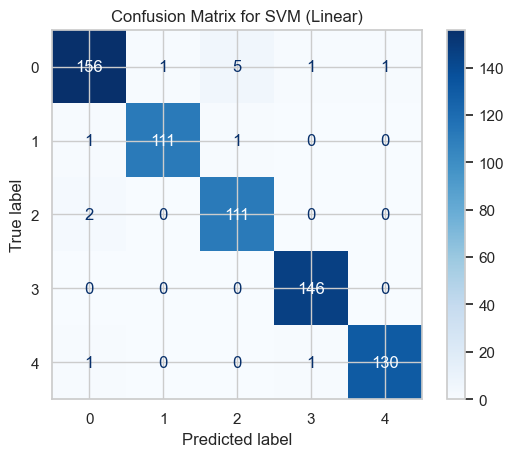

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM (Linear)")
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# predict on the test set
y_pred = log_reg.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# results
print("Evaluation Results for Logistic Regression:")
print(f"  Accuracy: {accuracy:.4f}")

# classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Evaluation Results for Logistic Regression:
  Accuracy: 0.9746

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       164
           1       1.00      0.97      0.99       113
           2       0.96      0.98      0.97       113
           3       0.97      1.00      0.98       146
           4       0.99      0.95      0.97       132

    accuracy                           0.97       668
   macro avg       0.98      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668


Confusion Matrix:
[[159   0   4   1   0]
 [  1 110   1   0   1]
 [  2   0 111   0   0]
 [  0   0   0 146   0]
 [  3   0   0   4 125]]


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # type of regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],           # regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],       # optimization algorithm
    'max_iter': [100, 200, 500, 1000],              # maximum iterations
    'class_weight': [None, 'balanced']             # class weights
}

log_reg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy', 
    verbose=1,
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# results
print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report on Test Set:")
print(classification_rep)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Hyperparameters: {'C': 100, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.9820

Test Set Accuracy: 0.9790419161676647

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       164
           1       0.99      0.98      0.99       113
           2       0.95      0.98      0.97       113
           3       0.99      1.00      0.99       146
           4       0.99      0.98      0.99       132

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



Final Model Test Set Accuracy: 0.9790419161676647

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       164
           1       0.99      0.98      0.99       113
           2       0.95      0.98      0.97       113
           3       0.99      1.00      0.99       146
           4       0.99      0.98      0.99       132

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



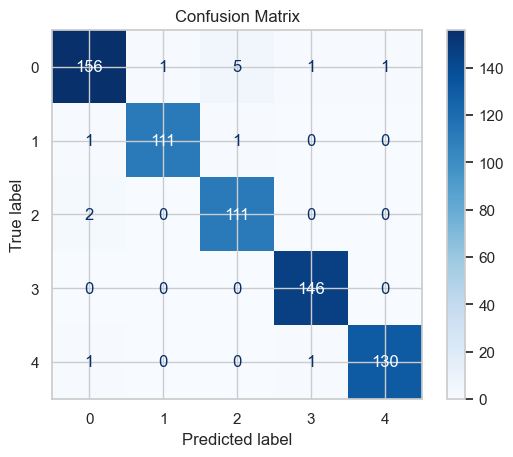

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

best_hyperparameters = {
    'C': 100,
    'penalty': 'l2',
    'solver': 'saga',
    'max_iter': 100,
    'class_weight': None
}

final_model = LogisticRegression(
    random_state=42,
    C=best_hyperparameters['C'],
    penalty=best_hyperparameters['penalty'],
    solver=best_hyperparameters['solver'],
    max_iter=best_hyperparameters['max_iter'],
    class_weight=best_hyperparameters['class_weight']
)

final_model.fit(X_train, y_train)

# make predictions on the test set
y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# results
print("Final Model Test Set Accuracy:", accuracy)
print("\nClassification Report on Test Set:")
print(classification_rep)

# confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# cross-validation
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='accuracy')

final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# results
print(f"Cross-Validation Mean Accuracy (Training Set): {cv_scores.mean():.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Cross-Validation Mean Accuracy (Training Set): 0.9820
Training Accuracy: 1.0000
Test Accuracy: 0.9790


In [41]:
y_pred = final_model.predict(X_test)

# DataFrame for results
results_df = pd.DataFrame({
    'Text': data_test['text'].reset_index(drop=True),
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred
})

# filter for misclassifications where Actual = 0 and Predicted = 2
misclassified_df = results_df[(results_df['Actual'] == 0) & (results_df['Predicted'] == 2)]

misclassified_indices = misclassified_df.index.tolist()  

feature_names = vectorizer.get_feature_names_out()  
for pos, idx in enumerate(misclassified_indices):
    tfidf_row = X_test[idx].toarray().flatten()  
    top_keywords_idx = np.argsort(tfidf_row)[-10:]  # get top 10 keyword indices
    top_keywords = [(feature_names[i], tfidf_row[i]) for i in top_keywords_idx if tfidf_row[i] > 0]
    
    print(f"\nTop Keywords for Misclassified Example {pos + 1} (Index {idx}):")
    for keyword, score in top_keywords:
        print(f"{keyword}: {score:.4f}")

# misclassified examples
print("\nMisclassified Examples:")
print(misclassified_df[['Text', 'Actual', 'Predicted']])


Top Keywords for Misclassified Example 1 (Index 50):
professional: 0.1651
unskilled: 0.1669
age: 0.1804
years: 0.1928
worker: 0.1933
manual: 0.2409
life: 0.2465
pension: 0.2948
ppi: 0.3212
expectancy: 0.4818

Top Keywords for Misclassified Example 2 (Index 139):
request: 0.1182
compulsory: 0.1279
default: 0.1341
imposing: 0.1403
workers: 0.1909
discrimination: 0.1985
employers: 0.2420
65: 0.2775
retirement: 0.3277
age: 0.5316

Top Keywords for Misclassified Example 3 (Index 155):
state: 0.1504
savings: 0.1511
report: 0.1538
higher: 0.1693
tank: 0.1836
overhaul: 0.1909
ppi: 0.2215
retirement: 0.3068
pensions: 0.3777
pension: 0.4066

Top Keywords for Misclassified Example 4 (Index 171):
golden: 0.1223
speculation: 0.1227
pace: 0.1287
labour: 0.1338
treasury: 0.1359
rise: 0.1407
rate: 0.2075
election: 0.2290
brown: 0.2666
balls: 0.4573

Top Keywords for Misclassified Example 5 (Index 348):
gosaibi: 0.0978
foreign: 0.1305
al: 0.1382
arab: 0.1588
employing: 0.1588
saud: 0.1955
prince: 0.20

In [37]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

data_test = data.iloc[y_test.index]

# randomly select 3 examples
random_indices = np.random.choice(len(data_test), 3, replace=False)
selected_examples = data_test.iloc[random_indices]

# make predictions
demo_X = X_test[random_indices]  
demo_predictions = final_model.predict(demo_X)

# results
print("Randomly Selected Examples:")
for i, idx in enumerate(random_indices):
    print(f"Example {i+1}:")
    print(f"Text: {selected_examples.iloc[i]['text']}")
    print(f"Actual Category: {selected_examples.iloc[i]['category']}")
    print(f"Predicted Category: {demo_predictions[i]}")
    print("-" * 50)


Randomly Selected Examples:
Example 1:
Text: usher leads billboard nominations r&b singer usher is leading the race for the billboard awards with nominations in 13 categories  including best male.  alicia keys has 12 nominations for the awards  which will be held on 8 december at the mgm grand in las vegas. other multiple nominees include maroon5  outkast  kanye west  r kelly  gretchen wilson  hoobastank and jay-z. soul singer stevie wonder will receive billboard s century award  the magazine s highest honour for creative achievement  at the ceremony.  the awards will be hosted by american idol presenter ryan seacrest  and will feature performances by usher  gwen stefani  nelly and green day. usher and keys will be battling it out for prizes including artist of the year  hot 100 songwriter of the year and billboard 200 album of the year for their respective albums confessions and the diary of alicia keys. maroon5 and outkast are also up for artist of the year  while outkast s speakerbo